In [3]:
from keras.applications import VGG16
from keras import backend as K

In [4]:
model=VGG16(weights="imagenet",include_top=False)





58892288/58889256 [==============================] - 420s 7us/step








In [5]:
layer_name="block3_conv1"
filter_index=0
layer_output=model.get_layer(layer_name).output
loss=K.mean(layer_output[:,:,:,filter_index])

In [7]:
grads=K.gradients(loss,model.input)[0]
grads/=(K.sqrt(K.mean(K.square(grads)))+0.00005)

In [9]:
iterate=K.function([model.input],[loss,grads])
import numpy as np

In [10]:
loss_value,grad_value=iterate([np.zeros((1,150,150,3))])

In [12]:
input_img_data=np.random.random((1,150,150,3))*20 + 128
step=1
for i in range(40):
    loss_value,grads_value=iterate([input_img_data])
    input_img_data+=grads_value*step

In [13]:
def deprocess_image(x):
    x-=x.mean()
    x/=(x.std()+0.000005)
    x+=0.5
    x=np.clip(x,0,1)
    x*=255
    x=np.clip(x,0,255).astype('uint8')
    return x

In [18]:
def generate_pattern(layer_name,filter_index,size=):
    layer_output=model.get_layer(layer_name).output
    loss=K.mean(layer_output[:,:,:,filter_index])
    grads=K.gradients(loss,model.input)[0]
    grads/=(K.sqrt(K.mean(K.square(grads)))+0.00005)
    iterate=K.function([model.input],[loss,grads])
    input_img_data=np.random.random((1,150,150,3))*20 + 128
    step=1
    for i in range(100):
        loss_value,grads_value=iterate([input_img_data])
        input_img_data+=grads_value*step
        img=input_img_data[0]
    return deprocess_image(img)

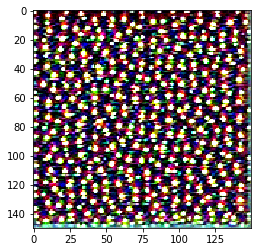

In [19]:
import matplotlib.pyplot as plt
plt.imshow(generate_pattern('block3_conv1',0))

In [30]:
layer_name='block4_conv1'
size=150
margin=5
results=np.zeros((8*size+7*margin,8*size+7*margin,3))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


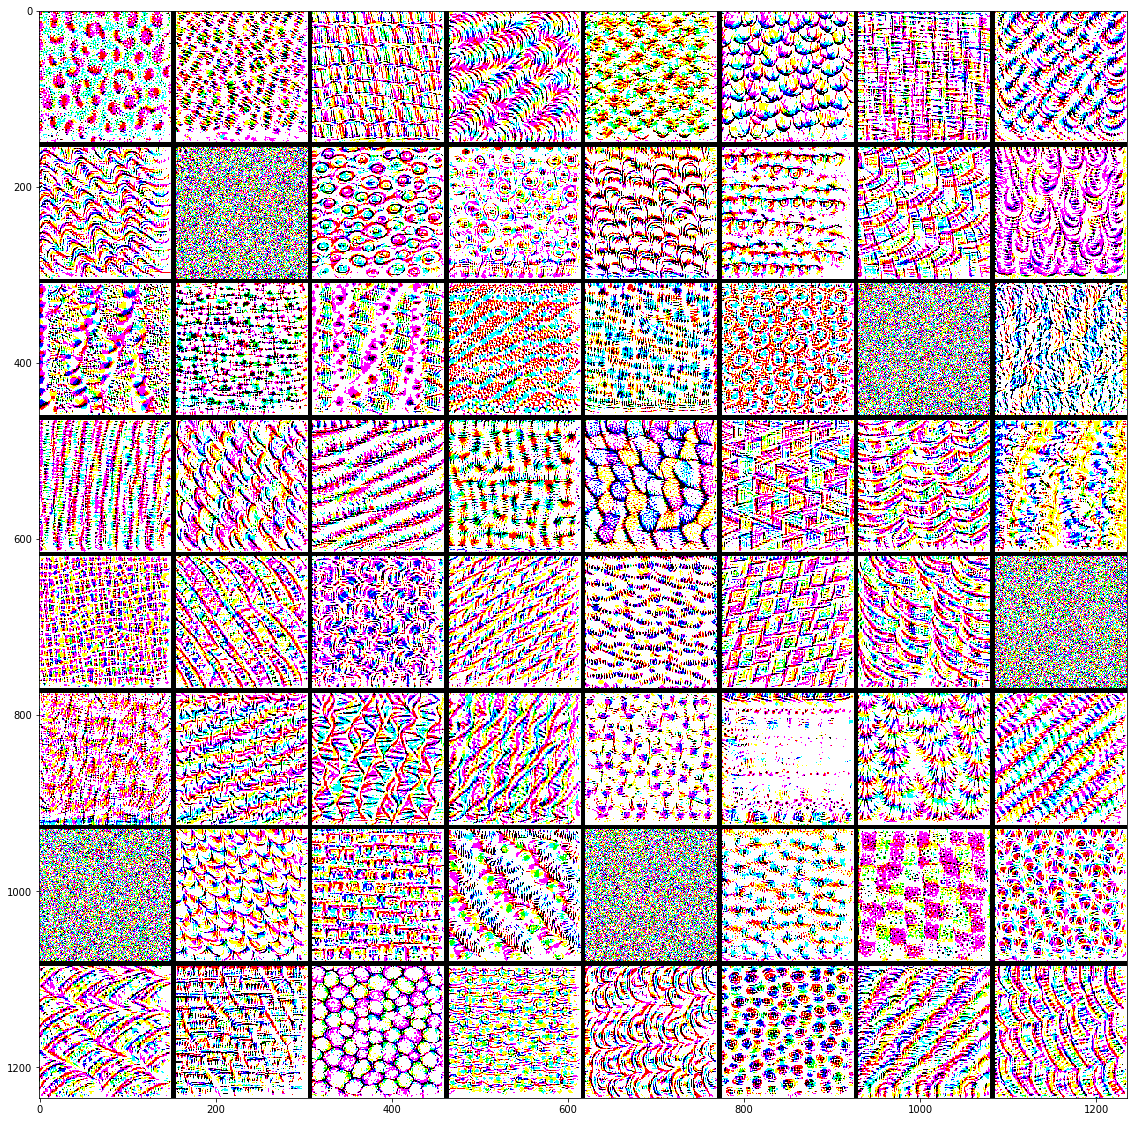

In [31]:
for i in range(8):
    for j in range(8):
        filter_img=generate_pattern(layer_name,i+(j*8),size=150)
        
        horizontal_start=i*size+i*margin
        horizontal_end=horizontal_start+size
        vertical_start=j*size+j*margin
        vertical_end=vertical_start+size
        results[horizontal_start:horizontal_end,vertical_start:vertical_end,:]=filter_img

plt.figure(figsize=(20,20))
plt.imshow(results)